# Online Retail Sales Assessment

An e-commerce company aims to optimize its marketing and customer retention strategies. Currently, all customers receive the same promotions and communications, but the results are not optimal. To  improve campaign effectiveness, the company has decided to segment its customers into groups with similar characteristics and purchasing behaviors.

- Identify different customer segments based on purchase frequency, spending 
patterns, and transaction volume. 
- Analyze the characteristics of each segment to understand consumption patterns 
and specific needs. 
- Propose personalized marketing strategies for each segment, such as targeted 
promotions, product recommendations, or loyalty programs. 
- Optimize data-driven business decision-making to improve profitability and customer 
satisfaction.

## Dataset description

InvoiceNo	StockCode	Description	Quantity	InvoiceDate	UnitPrice	CustomerID	Country

- `InvoiceNo:` Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- `StockCode:` Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- `Description:` Product (item) name. Nominal.
- `Quantity:` The quantities of each product (item) per transaction. Numeric.
- `InvoiceDate:` Invoice Date and time. Numeric, the day and time when each transaction was generated.
- `UnitPrice:` Unit price. Numeric, Product price per unit
- `CustomerID:` Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- `Country:` Country name. Nominal, the name of the country where each customer resides.



## Structure

1. Data Exploration
2. Missing values
3. Correlations analysis
4. Feature engineering (feature selection, feature transformation, feature creation, and evaluation)
5. Data transformations, such as normalization or standardization. 
6. Model comparison (K-means, Hierarchical clustering, DBSCAN)

## General Model Settings

In [182]:
# Set standard figure size to copy plots to presentation

fs = (15, 7)

## 1. Data Exploration

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset and check the first rows of the data.

In [184]:
## Load data only if it doesn't exist in the enviroment already to save time

try:
    df_full
    print('Data already loaded, to reload full dataframe restart the kernel')
except NameError:
    df_full = pd.read_excel('DATA/Online Retail.xlsx')
    print('Data loaded')

Data already loaded, to reload full dataframe restart the kernel


In [185]:
df = df_full.copy()
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceDayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010-12,2
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010-12,2
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,2
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12,2


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529062 entries, 0 to 541539
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         529062 non-null  object        
 1   StockCode         529062 non-null  object        
 2   Description       529062 non-null  object        
 3   Quantity          529062 non-null  int64         
 4   InvoiceDate       529062 non-null  datetime64[ns]
 5   UnitPrice         529062 non-null  float64       
 6   CustomerID        529062 non-null  object        
 7   Country           529062 non-null  object        
 8   TotalAmount       529062 non-null  float64       
 9   InvoiceMonth      529062 non-null  period[M]     
 10  InvoiceDayOfWeek  529062 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5), period[M](1)
memory usage: 46.4+ MB


In [187]:
# Customer count per country 

country_df = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False) / len(df['CustomerID'].unique()) * 100
display(country_df.reset_index().head(20))

,Country,CustomerID
0,United Kingdom,91.838158
1,Germany,1.639344
2,France,1.569585
3,Spain,0.523195
4,EIRE,0.505755
5,Belgium,0.435996
6,Switzerland,0.418556
7,Portugal,0.348797
8,Italy,0.244158
9,Finland,0.209278


From this we see that:
-  The total dataset has 541909 rows and only 8 columns.
- `CustomerID` is a float, but it should be an integer.
- `Description` has some missing values
- `InvoiceDate` is already a DataTime object

### Checking for unique values

## 2. Missing / faulty values

In [188]:
missing = df.isna().sum()
missing.sort_values(ascending=False, inplace=True)

display(missing)

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
TotalAmount         0
InvoiceMonth        0
InvoiceDayOfWeek    0
dtype: int64

CustomerID seems to have a lot of missing values, so we need to go deeper into this.

In [189]:
display(df[df['CustomerID'].isna()])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceDayOfWeek


Here, we also check for negative quantities and prices:

In [190]:
negative_quantity_pct = (df['Quantity'] < 0).mean() * 100
print(f"Percentage of rows with negative Quantity: {negative_quantity_pct:.2f}%")

len(df[df['UnitPrice'] < 0])

Percentage of rows with negative Quantity: 0.00%


0

**Key Takeaways:**
- Quantity has around 2% of negative values, which might be returns or an error
- UnitPrice has only 2 negative values, so we can consider them as errors

## Initial cleaning and imputation

1) **Impute missing customer IDs** with a placeholder value and convert to integer: 
For transactions without CustomerID we treat each invoice as a separate "customer", extract the invoices without CustomerID and create a synthetic CustomerID for these before adding them back to the main dataset for now; For the analysis we will exclude them to **only work on the real, identified customers.**

In [191]:
# First, extract invoices without CustomerID
invoices_without_customer = df[df['CustomerID'].isna()].copy()

# Create synthetic CustomerIDs based on invoice numbers for these transactions
invoices_without_customer['CustomerID'] = invoices_without_customer['InvoiceNo'].astype(str) + '_anon'

# Clean the CustomerID column to ensure it only contains valid integer-like values
df_with_customer = df.dropna(subset=['CustomerID']).copy()
df_with_customer['CustomerID'] = df_with_customer['CustomerID'].str.split('.').str[0]  # Remove decimal part if present

# Combine with transactions that have real CustomerIDs
df = pd.concat([
	df_with_customer,
	invoices_without_customer
])

2. Remove rows with missing descriptions


In [192]:
df['Description'] = df['Description'].fillna('Unknown Item')

3. Remove returns (negative order quantity) and rows with negative or null unit prices

In [193]:
df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] != 0)]

df = df[(df['Quantity'] > 0) & (df['Quantity'] != 0)]

### Outlier Analysis & Removal

In [194]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,529062.0,10.547783,1.0,1.0,3.0,10.0,80995.0,155.642793
InvoiceDate,529062,2011-07-04 21:35:27.707452672,2010-12-01 08:26:00,2011-03-28 12:23:00,2011-07-20 13:26:00,2011-10-19 13:20:00,2011-12-09 12:50:00,NaN
UnitPrice,529062.0,3.3851,0.04,1.25,2.08,4.13,13541.33,26.949184
TotalAmount,529062.0,19.623712,0.06,3.75,9.9,17.7,168469.6,269.600545
InvoiceDayOfWeek,529062.0,2.437637,0.0,1.0,2.0,4.0,6.0,1.850961


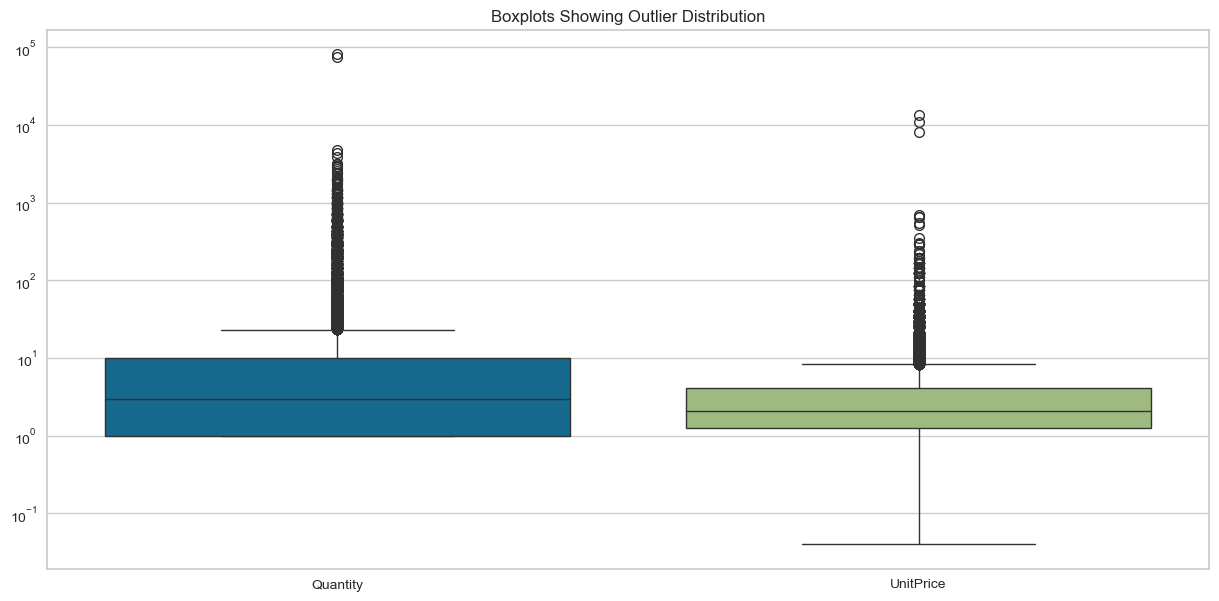

In [195]:
hist_cols = ['Quantity', 'UnitPrice']

# Boxplots to visualize outliers
plt.figure(figsize=fs)
sns.boxplot(data=df[hist_cols])
plt.title('Boxplots Showing Outlier Distribution')
plt.yscale('log')  # Log scale to better visualize the distribution
plt.show()

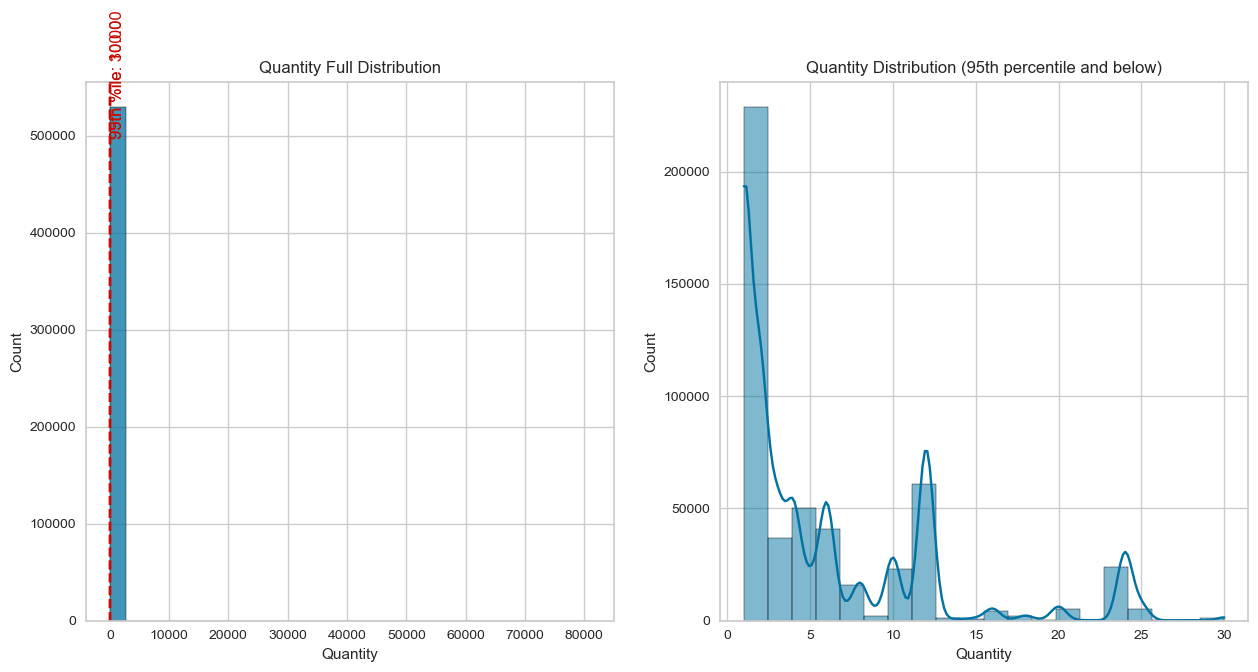


Summary for Quantity:
Mean: 10.55
Median: 3.00
Min: 1.00
Max: 80995.00
95th percentile: 30.00
99th percentile: 100.00
% of data above 99th percentile: 0.92%


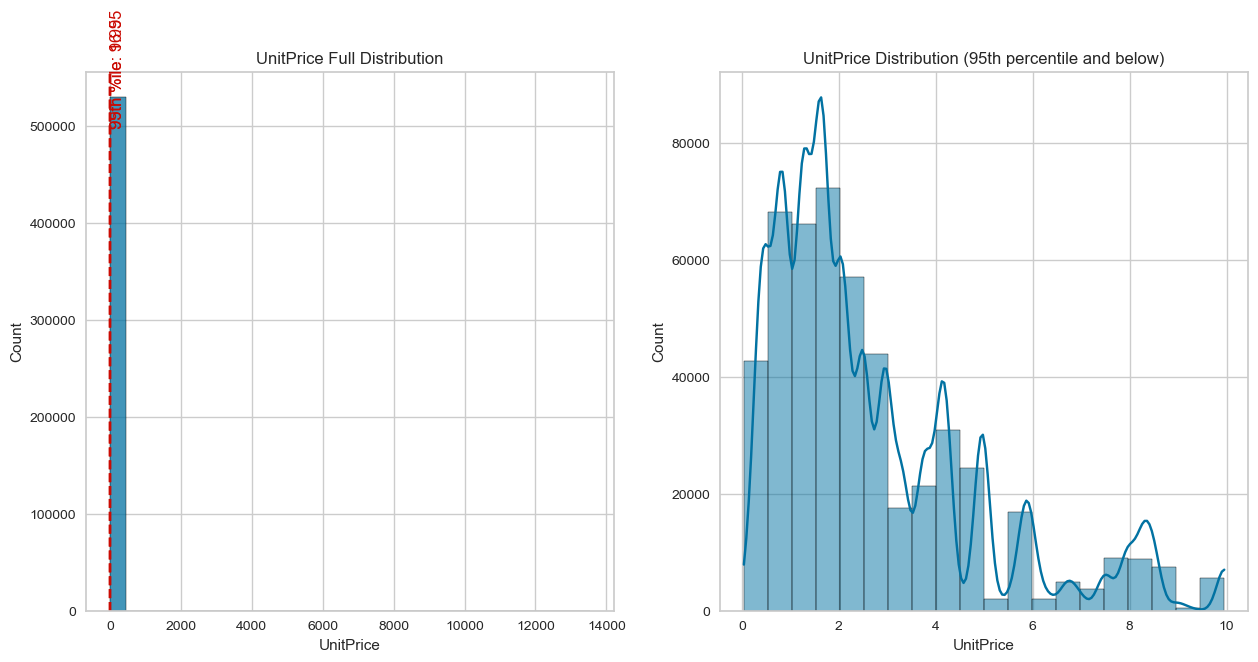


Summary for UnitPrice:
Mean: 3.39
Median: 2.08
Min: 0.04
Max: 13541.33
95th percentile: 9.95
99th percentile: 16.95
% of data above 99th percentile: 0.86%


In [196]:
# Enhanced histogram visualization with percentile markers
for col in hist_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=fs)
    
    # Original distribution
    sns.histplot(data=df, x=col, bins=30, ax=ax1)
    ax1.set_title(f'{col} Full Distribution')
    
    # Add percentile lines
    for p in [95, 99]:
        pct_val = df[col].quantile(p/100)
        ax1.axvline(x=pct_val, color='r', linestyle='--')
        ax1.text(pct_val, ax1.get_ylim()[1]*0.9, f'{p}th %ile: {pct_val:.2f}', 
                 rotation=90, color='r')
    
    # Zoomed distribution (without extreme outliers)
    upper_limit = df[col].quantile(0.95)
    sns.histplot(data=df[df[col] <= upper_limit], x=col, bins=20, ax=ax2, kde=True)
    ax2.set_title(f'{col} Distribution (95th percentile and below)')
    
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary for {col}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")
    print(f"95th percentile: {df[col].quantile(0.95):.2f}")
    print(f"99th percentile: {df[col].quantile(0.99):.2f}")
    print(f"% of data above 99th percentile: {(df[col] > df[col].quantile(0.99)).mean()*100:.2f}%")

#### Examine the top 10 highest outliers

In [197]:
for col in hist_cols:
    print(f"\nTop 10 highest {col} values:")
    outliers_high = df.sort_values(by=col, ascending=False).head(20)
    display(outliers_high[['CustomerID', 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice']])


Top 10 highest Quantity values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice
540421,16446,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08
61619,12346,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04
421632,12901,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,0.21
206121,13135,554868,22197,SMALL POPCORN HOLDER,4300,0.72
97432,18087,544612,22053,EMPIRE DESIGN ROSETTE,3906,0.82
270885,14609,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,0.06
160546,15749,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10
52711,15749,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10
433788,16308,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,0.32
291249,12931,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,1.45



Top 10 highest UnitPrice values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice
15017,537632_anon,537632,AMAZONFEE,AMAZON FEE,1,13541.33
299982,A563185_anon,A563185,B,Adjust bad debt,1,11062.06
173382,16029,551697,POST,POSTAGE,1,8142.75
236402,12432,557754,POST,POSTAGE,1,700.00
222682,15098,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,649.50
222680,15098,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50
264976,17444,560187,POST,POSTAGE,1,550.94
187584,12590,552980,POST,POSTAGE,1,523.00
142988,12415,548661,POST,POSTAGE,1,350.00
485574,12349,577609,POST,POSTAGE,1,300.00


Especially regarding quantity there are two very high outliers at a factor 20x to the next highest value. Only those two values will be removes.

For the unit price, there are also two very high outliers, which don't make sense since they are an "Amazon Fee" and a bad debt adjustments; Both rather seem like an accounting misbooking and thus have to be removed; The **DOTCOM POSTAGE** also seems a bit weird, so this is the last deep-dive we will do.

In [198]:
df = df[~df['InvoiceNo'].isin([581483, 541431])]

In [199]:
df[df['StockCode'] == 'DOT'].describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDate,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
UnitPrice,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalAmount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDayOfWeek,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df[df['StockCode'] == 'M'].describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDate,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
UnitPrice,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalAmount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDayOfWeek,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the `DOT` sales seem to be postage-related and thus not a true product sale and a manual stock code `M` has no information about the actual product itself, we will remove these rows.

In [201]:
df = df[~df['StockCode'].isin(['DOT', 'M', 'POST'])]

#### Examine the top 10 highest outliers

In [202]:
for col in hist_cols:
    print(f"\nTop 10 lowest {col} values:")
    outliers_low = df.sort_values(by=col, ascending=True).head(20)
    display(outliers_low[['CustomerID', 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice']])


Top 10 lowest Quantity values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice
541539,581498_anon,581498,85174,S/4 CACTI CANDLES,1,10.79
123129,546892_anon,546892,82567,"AIRLINE LOUNGE,METAL SIGN",1,1.63
123128,546892_anon,546892,82482,WOODEN PICTURE FRAME WHITE FINISH,1,4.96
123127,546892_anon,546892,79321,CHILLI LIGHTS,1,5.75
123126,546892_anon,546892,79302M,"ART LIGHTS,FUNK MONKEY",1,5.79
123123,546892_anon,546892,48194,DOORMAT HEARTS,1,15.79
123122,546892_anon,546892,37500,TEA TIME TEAPOT IN GIFT BOX,1,8.29
123121,546892_anon,546892,35971,ROSE FOLKART HEART DECORATIONS,1,2.46
123118,546892_anon,546892,23194,GYMKHANA TREASURE BOOK BOX,1,4.58
123117,546892_anon,546892,23183,MOTHER'S KITCHEN SPOON REST,1,7.46



Top 10 lowest UnitPrice values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice
229052,14321,557009,16045,POPART WOODEN PENCILS ASST,100,0.04
428605,13186,573486,16045,POPART WOODEN PENCILS ASST,100,0.04
308637,14414,564043,16045,POPART WOODEN PENCILS ASST,100,0.04
383665,12524,570082,16045,POPART WOODEN PENCILS ASST,100,0.04
325477,12627,565442,16045,POPART WOODEN PENCILS ASST,100,0.04
434038,12748,574025,16045,POPART WOODEN PENCILS ASST,100,0.04
382404,17651,569900,16045,POPART WOODEN PENCILS ASST,100,0.04
334170,12635,566233,16045,POPART WOODEN PENCILS ASST,100,0.04
301848,14156,563355,16045,POPART WOODEN PENCILS ASST,100,0.04
255649,15675,559358,16045,POPART WOODEN PENCILS ASST,100,0.04


In [203]:
num_pads = len(df[df['StockCode'] == 'PADS'])
num_bank_charges = len(df[df['StockCode'] == 'BANK CHARGES'])

print(f'There are {num_pads} pads in the dataset with a total of {df[df["StockCode"] == "PADS"]["Quantity"].sum()} units sold.')
print(f'There are {num_bank_charges} bank charges in the dataset with a total of {df[df["StockCode"] == "BANK CHARGES"]["Quantity"].sum()} units sold.')

There are 0 pads in the dataset with a total of 0 units sold.
There are 0 bank charges in the dataset with a total of 0 units sold.


Since both `PADS` and the bank charges do not seem like actual products, plus appear only once we remove them:

In [204]:
df = df[~df['StockCode'].isin(["PADS", "BANK CHARGES"])]

In [205]:
df[df['CustomerID'] == "12346"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceDayOfWeek


## 4. Feature engineering

#### RFM Core Metrics

- **Recency:**  
  Recent customers are more likely to purchase again. By measuring the time since their last purchase, we can identify which customers are still active and target those who might be at risk of churning.

- **Frequency:**  
  Repeated purchasing is a strong indicator of loyalty. Tracking how often a customer makes a purchase helps us recognize our regular buyers and reward their commitment.

- **Monetary:**  
  High spenders are typically our most valuable customers. By summing the total spend per customer, we can focus on those who generate the highest revenue and tailor premium services or offers to them.

#### Other Basket Metrics

- **AvgBasketSize:**  
  This feature helps distinguish bulk buyers from small purchasers. Customers with larger basket sizes might be more interested in deals on quantity or might have different product preferences compared to those who purchase less per transaction.

- **AvgOrderValue:**  
  Identifying high-value versus low-value transactions, regardless of frequency, gives us insight into the purchasing power of our customers. This metric can inform strategies for upselling and cross-selling.

- **DistinctProducts:**  
  Tracking the number of unique products purchased helps us understand customer diversity. Customers buying a variety of items might have broader interests, while those focused on a few products may indicate a niche preference that can be catered to.

#### Some Operational KPIs

- **InvoiceDayOfWeek:**  
  Analyzing the day of the week when purchases occur can uncover patterns in customer behavior, such as peak shopping days, which is critical for timing promotions and managing inventory.

- **InvoiceMonth:**  
  Looking at the month of the invoice provides insights into seasonal trends and helps us plan for fluctuations in demand, ensuring our marketing and operational strategies are aligned with customer buying cycles.


#### UK Flag

Since we have seen that around 90% of the customers come from the UK, we will separate them from the rest of the world using a binary flag.

In [206]:
# First, create a reference date (last date in the dataset + 1 day)
last_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID to create customer-level features
customer_features = df.groupby('CustomerID').agg(
    # Recency - days since last purchase
    Recency=('InvoiceDate', lambda x: (last_date - x.max()).days),
    
    # Frequency - count of invoices (unique)
    Frequency=('InvoiceNo', lambda x: x.nunique()),
    
    # Monetary - total spend
    Monetary=('TotalAmount', 'sum'),
    
    # Alternative/Additional Features
    AvgBasketSize=('Quantity', 'mean'),  # Average items per order
    AvgOrderValue=('TotalAmount', 'mean'),  # Average spend per order
    DistinctProducts=('StockCode', lambda x: x.nunique()),  # Count unique products
    
    # Country
    Country=('Country', 'first')
).reset_index()

# Extract the month from the InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Extract the day of the week from the InvoiceDate
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Add UK vs International flag
customer_features['IsUK'] = (customer_features['Country'] == 'United Kingdom').astype(int)

In [207]:
print(df[['StockCode','CustomerID', 'Country', 'InvoiceNo', 'Description']].nunique())
real_customers = df[~df['CustomerID'].str.endswith('_anon')]['CustomerID'].nunique()
print(f"Number of real customers: {real_customers}")
df_full = df.copy()
print(f'Full dataframe shape: {df_full.shape}')

df = df[~df['CustomerID'].str.endswith('_anon')]
print(f'Cleaned dataframe shape: {df.shape}')

StockCode       3916
CustomerID      5709
Country           38
InvoiceNo      19779
Description     4021
dtype: int64
Number of real customers: 4333
Full dataframe shape: (527934, 11)
Cleaned dataframe shape: (396468, 11)


In [208]:

print(f"\nTop 10 highest {col} values:")
outliers_high = df.sort_values(by='TotalAmount', ascending=False).head(20)
display(outliers_high[['CustomerID', 'InvoiceNo', 'StockCode', 'TotalAmount', 'UnitPrice']])


Top 10 highest UnitPrice values:


,CustomerID,InvoiceNo,StockCode,TotalAmount,UnitPrice
222680,15098,556444,22502,38970.00,649.50
348325,17450,567423,23243,7144.72,5.06
160546,15749,550461,21108,6539.40,2.10
52711,15749,540815,21108,6539.40,2.10
421601,14646,573003,23084,4992.00,2.08
52709,15749,540815,85123A,4921.50,2.55
160542,15749,550461,85123A,4632.00,2.40
52772,15749,540818,48185,4522.50,6.75
244419,17949,558526,23173,4401.00,8.15
160544,15749,550461,48185,4254.50,6.35


### Check the new dataframe head

In [209]:
df.head(3).T

,0,1,2
InvoiceNo,536365,536365,536365
StockCode,85123A,71053,84406B
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER
Quantity,6,6,8
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75
CustomerID,17850,17850,17850
Country,United Kingdom,United Kingdom,United Kingdom
TotalAmount,15.3,20.34,22.0
InvoiceMonth,2010-12,2010-12,2010-12


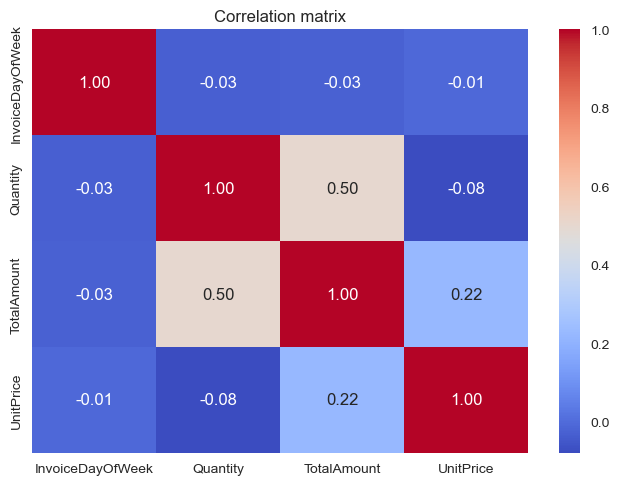

In [210]:
# Compute the correlation matrix
excluded_cols = ['StockCode', 'CustomerID', 'Country', 'InvoiceNo', 'Description', 'InvoiceDate', 'InvoiceMonth']

corr = df[df.columns.difference(excluded_cols)].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

In [211]:
drop_cols = ['Quantity', 'InvoiceDate', 'Description']
for col in drop_cols:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

## 5. Data transformations

* Log scale TotalSpent
* Standardize the data


In [212]:
display(df.head(3))
df.info()

,InvoiceNo,StockCode,UnitPrice,CustomerID,Country,TotalAmount,InvoiceMonth,InvoiceDayOfWeek
0,536365,85123A,2.55,17850,United Kingdom,15.30,2010-12,2
1,536365,71053,3.39,17850,United Kingdom,20.34,2010-12,2
2,536365,84406B,2.75,17850,United Kingdom,22.00,2010-12,2


<class 'pandas.core.frame.DataFrame'>
Index: 396468 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype    
---  ------            --------------   -----    
 0   InvoiceNo         396468 non-null  object   
 1   StockCode         396468 non-null  object   
 2   UnitPrice         396468 non-null  float64  
 3   CustomerID        396468 non-null  object   
 4   Country           396468 non-null  object   
 5   TotalAmount       396468 non-null  float64  
 6   InvoiceMonth      396468 non-null  period[M]
 7   InvoiceDayOfWeek  396468 non-null  int32    
dtypes: float64(2), int32(1), object(4), period[M](1)
memory usage: 25.7+ MB


### Log Transformation

In [213]:
customer_features_transformed = customer_features.copy()
for col in ['Monetary', 'AvgBasketSize', 'AvgOrderValue']:
    customer_features_transformed[col + '_log'] = np.log1p(customer_features[col])

### Feature Scaling

Here we scale the features using the `StandardScaler`; I decided against the `RobustScaler` since we already removed the outliers.

In [214]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'AvgOrderValue', 'DistinctProducts']
scaler = StandardScaler()
X_scaled = customer_features.copy()
X_scaled[numeric_cols] = scaler.fit_transform(customer_features[numeric_cols])

X_cluster = X_scaled.drop(['CustomerID', 'Country'], axis=1)

X_cluster.head(3)

,Recency,Frequency,Monetary,AvgBasketSize,AvgOrderValue,DistinctProducts,IsUK
0,-1.034950,0.519818,0.339343,-0.041383,-0.037862,0.328801,0
1,-0.380363,0.078730,-0.043229,0.652105,0.056793,-0.478053,0
2,-0.882512,-0.362358,-0.040524,-0.086644,-0.048874,0.023771,0


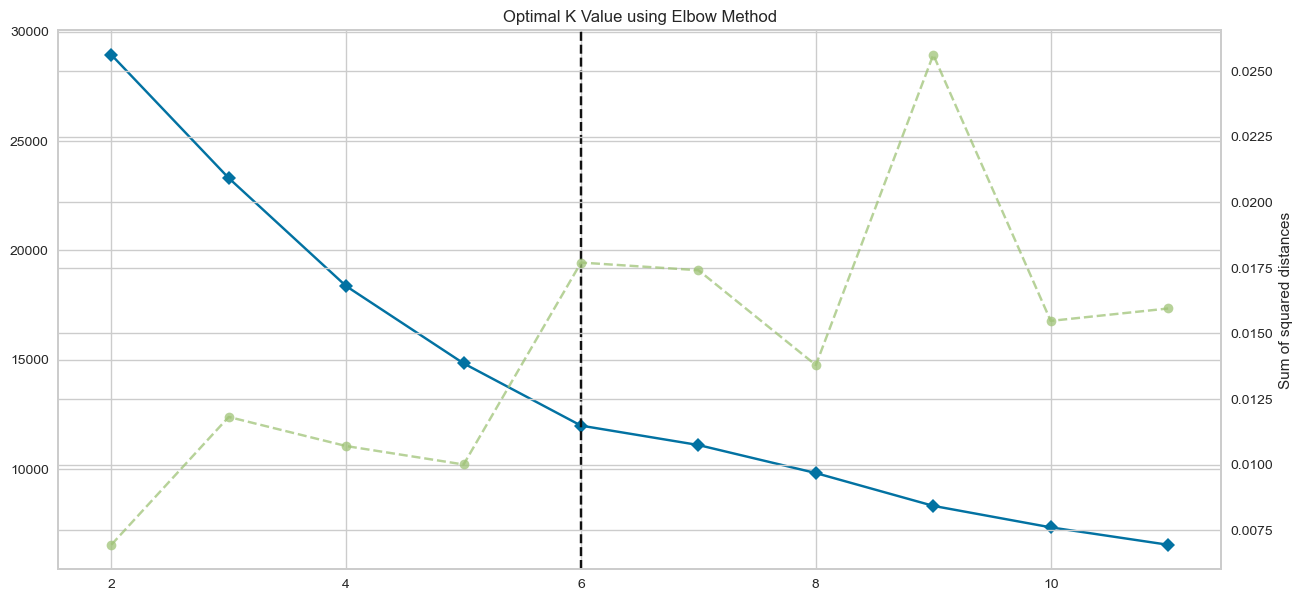

For n_clusters = 2, the silhouette score is 0.934
For n_clusters = 3, the silhouette score is 0.908
For n_clusters = 4, the silhouette score is 0.395
For n_clusters = 5, the silhouette score is 0.397
For n_clusters = 6, the silhouette score is 0.435
For n_clusters = 7, the silhouette score is 0.436
For n_clusters = 8, the silhouette score is 0.436
For n_clusters = 9, the silhouette score is 0.450
For n_clusters = 10, the silhouette score is 0.404
For n_clusters = 11, the silhouette score is 0.393


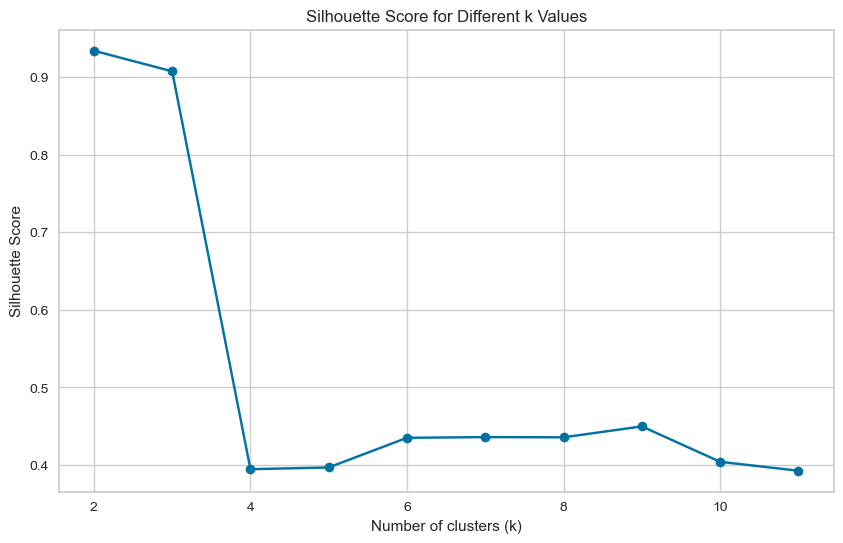

In [215]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Visualizer for KMeans
plt.figure(figsize=fs)
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 12))
visualizer.fit(X_cluster)
plt.title('Optimal K Value using Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.show()

# Calculate silhouette scores for different k values
silhouette_scores = []
k_values = range(2, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cluster)
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

In [216]:
# Assuming optimal k = 5 (adjust based on your results)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(X_cluster)

# Check cluster sizes
cluster_sizes = customer_features['Cluster'].value_counts()
print("Cluster sizes:")
print(cluster_sizes)

Cluster sizes:
Cluster
0    3263
3    1887
5     535
1      12
2       9
4       3
Name: count, dtype: int64


In [217]:
# Extract numeric cluster centers and inverse transform them
numeric_cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_[:, :len(numeric_cols)])
cluster_centers = pd.DataFrame(numeric_cluster_centers, columns=numeric_cols)

# Adding back UK as binary column
if 'IsUK' in X_cluster.columns:
    cluster_centers['IsUK'] = kmeans.cluster_centers_[:, X_cluster.columns.get_loc('IsUK')]

# Calculate average values for each cluster
cluster_analysis = customer_features.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'AvgBasketSize': 'mean',
    'AvgOrderValue': 'mean',
    'DistinctProducts': 'mean',
    'IsUK': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("Cluster Analysis:")
display(cluster_analysis)



Cluster Analysis:


,Recency,Frequency,Monetary,AvgBasketSize,AvgOrderValue,DistinctProducts,IsUK,Count
Cluster,,,,,,,,
0,48.926142,3.176525,1160.974778,16.375127,27.274097,51.848299,0.907447,3263
1,7.916667,88.583333,122713.685833,74.296726,172.143715,725.250000,0.666667,12
2,172.666667,1.888889,6781.608889,2233.255556,1953.471111,1.666667,1.000000,9
3,254.228405,1.299947,538.900938,10.322653,22.211486,37.918919,0.936407,1887
4,222.666667,1.666667,21506.630000,14.111111,12636.296667,1.000000,1.000000,3
5,53.549533,10.983178,6832.000093,14.920406,26.565645,276.263551,0.923364,535


In [218]:
# Create a detailed description of each cluster
cluster_names = {
    # Example - adjust based on your results
    0: "High-Value Loyal Customers",
    1: "Regular Mid-Value Shoppers",
    2: "New High-Potential Customers",
    3: "At-Risk Previous Customers",
    4: "Low-Value Occasional Buyers"
}

# Add names to the analysis dataframe
cluster_analysis['Segment'] = cluster_analysis.index.map(cluster_names)
display(cluster_analysis)

# Add segment names to customer dataframe
customer_features['Segment'] = customer_features['Cluster'].map(cluster_names)

# Export customer segments for business use
customer_segments = customer_features[['CustomerID', 'Cluster', 'Segment']]

,Recency,Frequency,Monetary,AvgBasketSize,AvgOrderValue,DistinctProducts,IsUK,Count,Segment
Cluster,,,,,,,,,
0,48.926142,3.176525,1160.974778,16.375127,27.274097,51.848299,0.907447,3263,High-Value Loyal Customers
1,7.916667,88.583333,122713.685833,74.296726,172.143715,725.250000,0.666667,12,Regular Mid-Value Shoppers
2,172.666667,1.888889,6781.608889,2233.255556,1953.471111,1.666667,1.000000,9,New High-Potential Customers
3,254.228405,1.299947,538.900938,10.322653,22.211486,37.918919,0.936407,1887,At-Risk Previous Customers
4,222.666667,1.666667,21506.630000,14.111111,12636.296667,1.000000,1.000000,3,Low-Value Occasional Buyers
5,53.549533,10.983178,6832.000093,14.920406,26.565645,276.263551,0.923364,535,NaN
